## Highest-posterior density
A commonly-used device to summarize the spread of a posterior distribution is to use a Highest-Posterior Density (HPD) interval. An HPD is the shortest interval containing a given portion of the probability density. One of the most commonly-used is the 95% HPD, often accompanied by the 50% HPD. If we say that the 95% HPD for some analysis is [2-5], we mean that according to our data and model, we think the parameter in question is between 2 and 5 with a probability of 0.95.

There is nothing special about choosing 95%, 50%, or any other value. They are just arbitrary commonly-used values; we are free to choose the 91.37% HPD interval if we like. If you want to use the 95% value, that's OK; just remember it is a default value. Ideally, justifications should be context-dependent and not automatic.

ArviZ is a Python package for exploratory data analysis for Bayesian models. ArviZ has many functions to help us summarize the posterior, for example, az.plot_posterior can be used to generate a plot with the mean and HPD of a distribution. In the following example, instead of a posterior from a real analysis, we are generating a random sample from a beta distribution:

In [2]:
import numpy as np
import arviz as az
from scipy import stats

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c1f1405f8>],
      dtype=object)

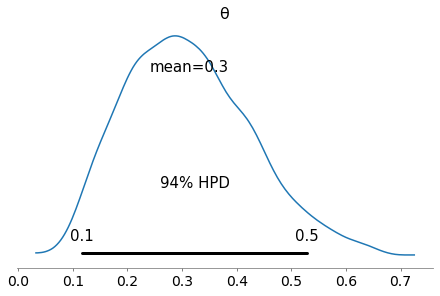

In [5]:
np.random.seed(1)
az.plot_posterior({'θ':stats.beta.rvs(5, 11, size=1000)})

Note that in Figure 1.7, the reported HPD is 94%. This is a friendly remainder of the arbitrary nature of the 95% value. Every time ArviZ computes and reports a HPD, it will use, by default, a value of 0.94 (corresponding to 94%). You can change this by passing a different value to the credible_interval argument.

*If you are familiar with the frequentist paradigm, please note that HPD intervals are not the same as confidence intervals. The HPD has a very intuitive interpretation, to the point that people often misinterpret frequentist confidence intervals as if they were Bayesian credible intervals. Performing a fully-Bayesian analysis enables us to talk about the probability of a parameter having some value. This is not possible in the frequentist framework since parameters are fixed by design; a frequentist confidence interval contains or does not contain the true value of a parameter.*

One of the nice elements of the Bayesian toolkit is that once we have a posterior, it is possible to use the posterior, , to generate predictions, , based on the data, , and the estimated parameters, . The posterior predictive distribution is:

In [17]:
from IPython.display import display, Math, Latex
display(Math(r'P(y\hat{}|y) = \int_{-\infty}^{\infty} P(y\hat{}|\theta) d\theta'))

<IPython.core.display.Math object>

Thus, the posterior predictive distribution is an average of conditional predictions over the posterior distribution of theta. Conceptually (and computationally), we approximate this integral 1.17 as an iterative two-step process:

* We sample a value theta of  from the posterior, p(theta | y)
* We feed that value of theta to the likelihood (or sampling distribution if you wish), thus obtaining a data point, y-tilda

*Notice how this process combines two sources of uncertainty: the parameters uncertainty; as captured by the posterior; and the sampling uncertainty; as captured by the likelihood.*

The generated predictions, y-tilda, can be used when we need to make predictions. But also we can use them to criticize the models by comparing the observed data, y, and the predicted data, y-tilda, to spot differences between these two sets, this is known as posterior predictive checks. 

The main goal is to check for auto-consistency. The generated data and the observed data should look more or less similar, otherwise there was some problem during the modeling or some problem feeding the data to the model. But even in the absence of mistakes, differences could arise. Trying to understand the mismatch could lead us to improve models or at least to understand their limitations. Knowing which parts of our problem/data the model is capturing well and which it is not is valuable information even if we do not know how to improve the model. Maybe the model captures the mean behavior of our data well but fails to predict rare values. This could be problematic for us, or maybe we only care about the mean, so this model will be OK to us. The general aim is not to declare that a model is false. We just want to know which part of the model we can trust, and try to test whether the model is a good fit for our specific purpose. How confident one can be about a model is certainly not the same across disciplines. Physics can study systems under highly-controlled conditions using high-level theories, so models are often seen as good descriptions of reality. Other disciplines, such as sociology and biology, study complex, difficult-to-isolate systems, and thus models usually have a weaker epistemological status. Nevertheless, independent of which discipline you are working in, models should always be checked, and posterior predictive checks together with ideas from exploratory data analysis are a good way to check our models.

A ROPE (Region Of Practical Equivalence) is an arbitrary interval we choose based on background knowledge. Any value inside this interval is assumed to be of practical equivalence.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x111d5fb38>],
      dtype=object)

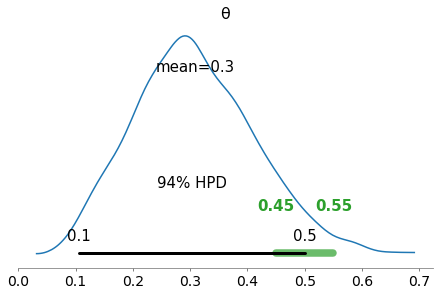

In [4]:
az.plot_posterior({'θ':stats.beta.rvs(5, 11, size=1000)}, rope=[0.45, .55])